# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Creating lists required for the dataframe
city_2 = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Setting query URL and units to imperial
measurement = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={measurement}&q="

# Setting initial count for index and set
index_counter = 0
set_counter = 1

print("-----------------------------\nBeginning Data Retrieval")

# Collceting data for each city in cities list, then printing as per example
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_2.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

-----------------------------
Beginning Data Retrieval
Processing Record 1 of Set 1 | okhotsk
City not found. Skipping...
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | constitucion
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | bluff
City not found. Skipping...
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | mayumba
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | saint-augustin
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | sao jose da coro

Processing Record 32 of Set 4 | dudinka
Processing Record 33 of Set 4 | sao filipe
Processing Record 34 of Set 4 | burnie
Processing Record 35 of Set 4 | hamilton
Processing Record 36 of Set 4 | yerofey pavlovich
Processing Record 37 of Set 4 | high level
Processing Record 38 of Set 4 | ahipara
Processing Record 39 of Set 4 | zheleznodorozhnyy
Processing Record 40 of Set 4 | hirado
Processing Record 41 of Set 4 | zorritos
Processing Record 42 of Set 4 | plaster rock
Processing Record 43 of Set 4 | buta
City not found. Skipping...
Processing Record 44 of Set 4 | archidona
Processing Record 45 of Set 4 | kalmunai
Processing Record 46 of Set 4 | beohari
Processing Record 47 of Set 4 | valparaiso
Processing Record 48 of Set 4 | palmer
Processing Record 49 of Set 4 | hay river
Processing Record 50 of Set 4 | khakhea
Processing Record 0 of Set 5 | saint-francois
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | boa vista
Processing Record 3 of Set 5 | kysyl-syr
Processing 

Processing Record 23 of Set 8 | jiaonan
Processing Record 24 of Set 8 | moba
Processing Record 25 of Set 8 | vao
Processing Record 26 of Set 8 | turkistan
Processing Record 27 of Set 8 | jamame
Processing Record 28 of Set 8 | tukrah
Processing Record 29 of Set 8 | novikovo
Processing Record 30 of Set 8 | wagar
Processing Record 31 of Set 8 | georgetown
Processing Record 32 of Set 8 | castro-urdiales
Processing Record 33 of Set 8 | nyandoma
Processing Record 34 of Set 8 | muzhi
Processing Record 35 of Set 8 | watertown
Processing Record 36 of Set 8 | lantawan
Processing Record 37 of Set 8 | fairbanks
Processing Record 38 of Set 8 | tashtagol
Processing Record 39 of Set 8 | kimbe
Processing Record 40 of Set 8 | sur
Processing Record 41 of Set 8 | kovur
Processing Record 42 of Set 8 | dergachi
Processing Record 43 of Set 8 | rockport
Processing Record 44 of Set 8 | mahebourg
Processing Record 45 of Set 8 | santa maria
Processing Record 46 of Set 8 | kisanga
Processing Record 47 of Set 8 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
#Creating the dataframe to display the results
city_weather_df = pd.DataFrame({ 
                "City" : city_2,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date
})

city_weather_df.to_csv(output_data_file)

# Showing the first five rows
city_weather_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Okhotsk,59.3833,143.3000,-9.11,80,0,18.03,RU,1612055798
1,Portland,45.5234,-122.6762,48.99,81,90,12.66,US,1612055602
2,Port Alfred,-33.5906,26.8910,63.00,92,0,0.89,ZA,1612056001
3,Vaini,-21.2000,-175.2000,86.00,79,75,13.80,TO,1612055978
4,Butaritari,3.0707,172.7902,81.32,78,30,18.86,KI,1612055542


In [8]:
# Displaying dataframe count, mean, std, min, 25%, 50%, 75% and max for each variable
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,19.959481,21.906095,47.796552,75.247292,52.736462,8.106949,1.612056e+09
std,33.412699,89.552984,33.742743,17.830786,42.022889,5.782097,2.957460e+02
min,-54.800000,-175.200000,-52.920000,13.000000,0.000000,0.310000,1.612055e+09
25%,-7.327150,-55.862050,26.600000,66.000000,1.000000,3.452500,1.612056e+09
50%,22.426100,24.807350,59.000000,79.000000,66.500000,6.910000,1.612056e+09
75%,48.634225,101.486025,74.595000,88.000000,98.000000,10.840000,1.612056e+09
max,78.218600,177.483300,98.600000,100.000000,100.000000,31.070000,1.612056e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Checking that no cities with >100% humidity exist
city_weather_df[city_weather_df["Humidity"] > 100].count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [17]:
# SKIP

Int64Index([], dtype='int64')

In [19]:
# SKIP

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [ ]:
# SKIP

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

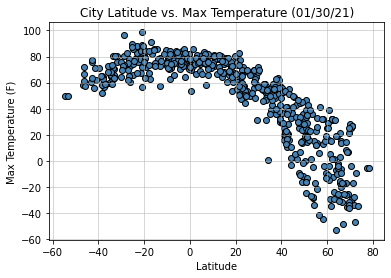

In [12]:
# Creating the scatter plot and setting formatting to match example
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Setting chart title
plt.title("City Latitude vs. Max Temperature (01/30/21)")

# Setting x axis label name
plt.xlabel("Latitude")

# Setting y axis label name
plt.ylabel("Max Temperature (F)")

# Setting grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Saving the plotted figure as a .png file to output_data folder
plt.savefig("../output_data/City Latitude vs Max Temperature.png")

#### The code is analyzing at what latitude does the temperature start dropping, with it being winter the further north you go the colder it gets

## Latitude vs. Humidity Plot

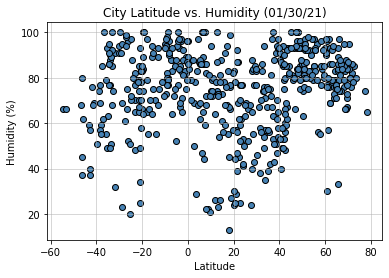

In [13]:
# Creating the scatter plot and setting formatting to match example
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Setting chart title
plt.title("City Latitude vs. Humidity (01/30/21)")

# Setting x axis label name
plt.xlabel("Latitude")

# Setting y axis label name
plt.ylabel("Humidity (%)")

# Setting grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Saving the plotted figure as a .png file to output_data folder
plt.savefig("../output_data/City Latitude vs Humidity.png")

#### The code is analyzing at what latitudes is it more humid at this time of the year, the picture would be quite different the summer in both extremes but would be relatively static closer to the equator

## Latitude vs. Cloudiness Plot

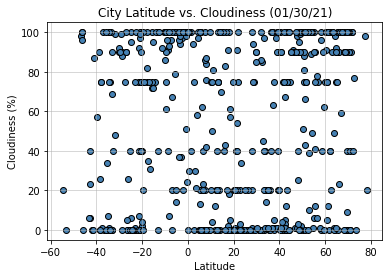

In [14]:
# Creating the scatter plot and setting formatting to match example
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Setting chart title
plt.title("City Latitude vs. Cloudiness (01/30/21)")

# Setting x axis label name
plt.xlabel("Latitude")

# Setting y axis label name
plt.ylabel("Cloudiness (%)")

# Setting grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Saving the plotted figure as a .png file to output_data folder
plt.savefig("../output_data/City Latitude vs Cloudiness.png")

#### The code is analyzing at what latitudes is it cloudier, which is spread evenly

## Latitude vs. Wind Speed Plot

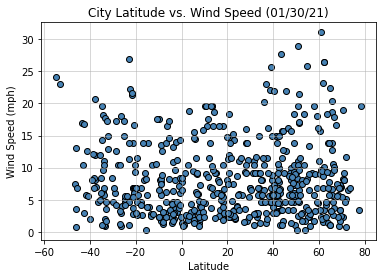

In [15]:
# Creating the scatter plot and setting formatting to match example
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Setting chart title
plt.title("City Latitude vs. Wind Speed (01/30/21)")

# Setting x axis label name
plt.xlabel("Latitude")

# Setting y axis label name
plt.ylabel("Wind Speed (mph)")

# Setting grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Saving the plotted figure as a .png file to output_data folder
plt.savefig("../output_data/City Latitude vs Wind Speed.png")

#### The code is analyzing at what latitudes is the wind speed the highest, it is fairly evenly spread but some extremiities in northern latitudes

## Linear Regression

In [20]:
# Creating dataframes for northern and southern hemispheres
northern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] >= 0]
southern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] < 0]


# Creating function that can be called for linear regression plot including x label and annotation
def plt_linear_regression(x_values, y_values, y_labelname, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_labelname)
    print(f"The r-value is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8638135311805368


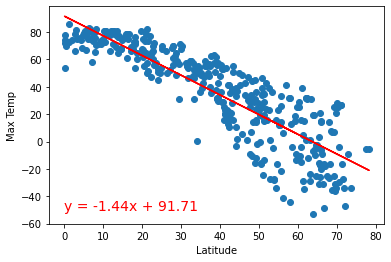

<Figure size 432x288 with 0 Axes>

In [24]:
# Setting axis values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

#Drawing graph and defining y label name and text coordinates
plt_linear_regression(x_values,y_values, "Max Temp", (0,-50))

plt.savefig("../output_data/Northern Hemisphere - Max Temp vs Latitude Linear Regression.png")

#### The correlation between latitude and temperature is negative, i.e. the further from the equator you are the colder it is 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5077403157851456


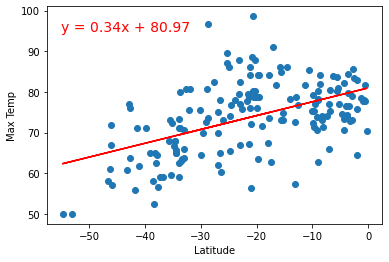

<Figure size 432x288 with 0 Axes>

In [27]:
# Setting axis values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

#Drawing graph and defining y label name and text coordinates
plt_linear_regression(x_values,y_values, "Max Temp", (-55,95))

plt.savefig("../output_data/Southern Hemisphere - Max Temp vs Latitude Linear Regression.png")

#### The correlation between latitude and temperature is positive, i.e. the closer to the equator you are the warmer it gets

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.29452793795919135


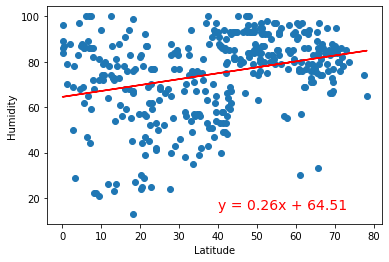

<Figure size 432x288 with 0 Axes>

In [31]:
# Setting axis values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

#Drawing graph and defining y label name and text coordinates
plt_linear_regression(x_values,y_values, "Humidity", (40,15))

plt.savefig("../output_data/Northern Hemisphere - Humidity vs Latitude Linear Regression.png")

#### The correlation between latitude and humidity is positive, i.e. it is more certainly humid the further away from the equator you are

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3476582810556823


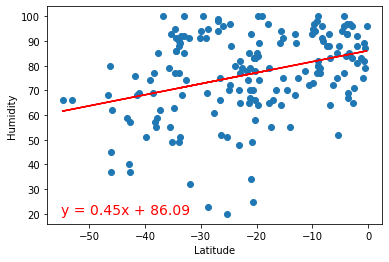

<Figure size 432x288 with 0 Axes>

In [33]:
# Setting axis values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

#Drawing graph and defining y label name and text coordinates
plt_linear_regression(x_values,y_values, "Humidity", (-55,20))

plt.savefig("../output_data/Southern Hemisphere - Humidity vs Latitude Linear Regression.png")

#### The correlation between latitude and humidity is positive, i.e. the closer to the equator you are the more certainly is it humid

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2245808881446803


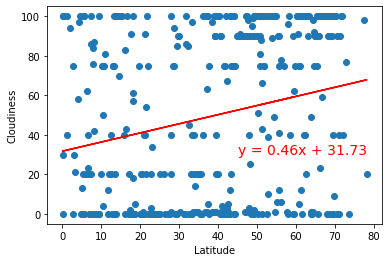

<Figure size 432x288 with 0 Axes>

In [37]:
# Setting axis values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

#Drawing graph and defining y label name and text coordinates
plt_linear_regression(x_values,y_values, "Cloudiness", (45,30))

plt.savefig("../output_data/Northern Hemisphere - Cloudiness vs Latitude Linear Regression.png")

#### The correlation between latitude and cloudiness is positive, i.e. it is cloudier the further away from the equator you are 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3766857506455504


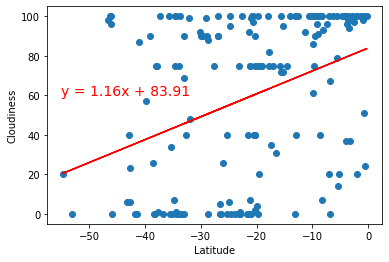

<Figure size 432x288 with 0 Axes>

In [42]:
# Setting axis values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

#Drawing graph and defining y label name and text coordinates
plt_linear_regression(x_values,y_values, "Cloudiness", (-55,60))

plt.savefig("../output_data/Southern Hemisphere - Cloudiness vs Latitude Linear Regression.png")

#### The correlation between latitude and cloudiness is positive, i.e. it is cloudier the closer to the equator you are

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06449471985330174


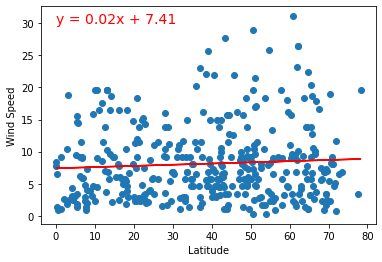

<Figure size 432x288 with 0 Axes>

In [44]:
# Setting axis values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

#Drawing graph and defining y label name and text coordinates
plt_linear_regression(x_values,y_values, "Wind Speed", (0,30))

plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs Latitude Linear Regression.png")

#### There is little correlation between latitude and wind speed, i.e. it is almost as windy everywhere regardless of latitude with some high peaks in northern latitudes

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2129159178027845


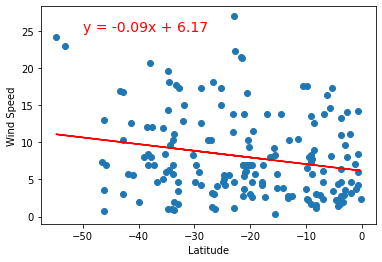

<Figure size 432x288 with 0 Axes>

In [46]:
# Setting axis values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

#Drawing graph and defining y label name and text coordinates
plt_linear_regression(x_values,y_values, "Wind Speed", (-50,25))

plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs Latitude Linear Regression.png")

#### There is a negative correlation between latitude and wind speed, i.e. the closer to equator you are, the less windy it is